In [24]:
#Mass Diffusion 物质扩散算法
def recommendMassDiff(ID):
    user_ereg_1={}
    movie_ereg_1={}
    scores=[]
    unwatched = np.where(ums_matrix[np.where(train_user_array==ID)[0][0]]==0)[0]
    convertindex= ums_matrix[np.where(train_user_array==ID)[0][0]]
    for i in range(0,len(convertindex)):# unwatched movie list for the target user
            m2u_edge= convertindex[i]/len(np.where(ums_matrix[:,i]==1)[0]) # Calculate the average energy by the number of links
            for j in range(0,len(ums_matrix)): # Iterate for each user
                if ums_matrix[j,i]==1: 
                    if j in  user_ereg_1.keys(): 
                        user_ereg_1[j] += m2u_edge
                    else:
                        user_ereg_1[j] = m2u_edge 
                else: 
                    if j in  user_ereg_1.keys(): 
                        user_ereg_1[j] += 0
                    else:
                        user_ereg_1[j] = 0 #If no links,the energy is 0
                    
    for w in range(0,len(ums_matrix)):
        u2m_edge= user_ereg_1[w]/len(np.where(ums_matrix[w,:]==1)[0]) 
        for z in range(0,len(convertindex)): 
            if ums_matrix[w,z]==1: 
                if z in  movie_ereg_1.keys():
                    movie_ereg_1[z] += u2m_edge
                else:
                    movie_ereg_1[z] = u2m_edge 
            else: 
                if z in  movie_ereg_1.keys():
                    movie_ereg_1[z] += 0
                else:
                    movie_ereg_1[z] = 0
                            
    for key,value in movie_ereg_1.items():
        if key in unwatched:
            temp = [key,value]
            scores.append(temp)
            
    for g in range(len(scores)):
        scores[g][0]= train_movie_array[[scores[g][0]]][0]
        
    sort_unwatched=sorted(scores, key=itemgetter(1),reverse=True)
    return sort_unwatched

In [25]:
#热传导算法
def recommendHeatspread(ID):
    q=0
    m_ini_heat=0
    user_ereg_1={}
    movie_ereg_1={}
    scores=[]
    unwatched = np.where(ums_matrix[np.where(train_user_array==ID)[0][0]]==0)[0]
    convertindex= ums_matrix[np.where(train_user_array==ID)[0][0]]
    labels=np.where(convertindex==1)
    for i in range(0,len(ums_matrix)): # Create an "unwatched" list for the target user.
        user_edge_num=len(np.where(ums_matrix[i,:]==1)[0]) # Get the number of links for each user
        for j in labels[0]: # If user has watched the movie that also watched by the target user, heat + 1
            if ums_matrix[i,j]==1: 
                q += 1
        user_heat=q/user_edge_num # Get the heat of each user
        user_ereg_1[i]=user_heat 
        q=0
        
    for w in range(0,len(convertindex)):
        movie_edge_num=len(np.where(ums_matrix[:,w]==1)[0])
        for p in np.where(ums_matrix[:,w]==1)[0]:
            m_ini_heat += user_ereg_1.get(p) 
        movie_heat=m_ini_heat/movie_edge_num
        movie_ereg_1[w]=movie_heat
        m_ini_heat = 0
        
    for key,value in movie_ereg_1.items():
        if key in unwatched:
            temp = [key,value]
            scores.append(temp)
            
    for g in range(len(scores)):
        scores[g][0]= train_movie_array[[scores[g][0]]][0]
        
    sort_unwatched=sorted(scores, key=itemgetter(1),reverse=True)
    return sort_unwatched

In [26]:
#Find users in both training and testing sets 同时存在于训练集和测试集的用户
common_users=sorted(list(set(train.userID)&set(test.userID)))

In [40]:
#Evaluate the precision of recommendation list HS method
precision_list=[]
for i in common_users:
        precision=len(list(set(test.movieID[test.userID==i])& set([item[0] for item in recommendHeatspread(i)][:20])))/len([item[0]for item in recommendHeatspread(i)][:20])
        precision_list.append(precision)
precision_heatspread = np.mean(precision_list)

In [41]:
#Evaluate the rank score of recommendation list HS method
user_RS_list=[]
all_RS_list=[]
for i in common_users:
    rec= recommendHeatspread(i)
    for w in  list(set(test.movieID[test.userID==i])& set([item[0] for item in rec])):
        for z in range(len(rec)):
            if w==rec[z][0]:
                RS=(z+1)/len(rec)
                user_RS_list.append(RS)
                if list(set(test.movieID[test.userID==i])& set([item[0] for item in rec])).index(w)+1 \
                == len(list(set(test.movieID[test.userID==i])& set([item[0] for item in rec]))):
                    user_RS=np.mean(user_RS_list)
                    all_RS_list.append([i,user_RS])
                    user_RS_list=[]
                break
RS_heatspread=(np.mean([piece[1] for piece in all_RS_list]))

In [42]:
RS_heatspread

0.20793097746202646

In [43]:
#Evaluate the precision of recommendation list MD method
precision_list=[]
for i in common_users:
        precision=len(list(set(test.movieID[test.userID==i])& set([item[0] for item in recommendMassDiff(i)][:20])))/len([item[0]for item in recommendMassDiff(i)][:20])
        precision_list.append(precision)
precision_Massdiff = np.mean(precision_list)

In [44]:
precision_Massdiff

0.08181818181818182

In [45]:
#Evaluate the rank score of recommendation list MD method
user_RS_list=[]
all_RS_list=[]
for i in common_users:
    rec= recommendMassDiff(i)
    for w in  list(set(test.movieID[test.userID==i])& set([item[0] for item in rec])):
        for z in range(len(rec)):
            if w==rec[z][0]:
                RS=(z+1)/len(rec)
                user_RS_list.append(RS)
                if list(set(test.movieID[test.userID==i])& set([item[0] for item in rec])).index(w)+1 \
                == len(list(set(test.movieID[test.userID==i])& set([item[0] for item in rec]))):
                    user_RS=np.mean(user_RS_list)
                    all_RS_list.append([i,user_RS])
                    user_RS_list=[]
                break
RS_Massdiff=(np.mean([piece[1] for piece in all_RS_list]))

In [46]:
RS_Massdiff

0.18224701409585414

In [47]:
print("\n The precision score based on user(CN) is: {:.5f}".format(precision_user_CN))
print("\n The precision score based on user(COSINE) is: {:.5f}".format(precision_user_COS))
print("\n The precision score based on movie(CN) is: {:.5f}".format(precision_movie_CN))
print("\n The precision score based on movie(COSINE) is: {:.5f}".format(precision_movie_COS))
print("\n The ranking score based on user(CN) is: {:.5f}".format(RS_user_CN))
print("\n The ranking score based on user(COSINE) is: {:.5f}".format(RS_user_COS))
print("\n The ranking score based on movie(CN) is: {:.5f}".format(RS_movie_CN))
print("\n The ranking score based on movie(COSINE) is: {:.5f}".format(RS_movie_COS))
print("\n The precision score based on heatspread is: {:.5f}".format(precision_heatspread))
print("\n The ranking score based on heatspread is: {:.5f}".format(RS_heatspread))
print("\n The precision score based on mass diffusion is: {:.5f}".format(precision_Massdiff))
print("\n The ranking score based on mass diffusion is: {:.5f}".format(RS_Massdiff))


 The precision score based on user(CN) is: 0.06364

 The precision score based on user(COSINE) is: 0.06364

 The precision score based on movie(CN) is: 0.00000

 The precision score based on movie(COSINE) is: 0.00000

 The ranking score based on user(CN) is: 0.24612

 The ranking score based on user(COSINE) is: 0.22781

 The ranking score based on movie(CN) is: 0.35741

 The ranking score based on movie(COSINE) is: 0.36724

 The precision score based on heatspread is: 0.01364

 The ranking score based on heatspread is: 0.20793

 The precision score based on mass diffusion is: 0.08182

 The ranking score based on mass diffusion is: 0.18225


In [63]:
np.random.random(2)

array([0.2232628 , 0.57631755])

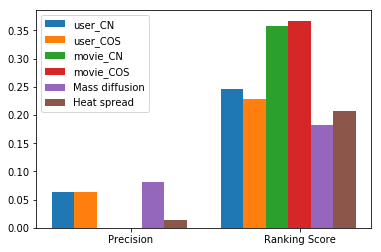

In [89]:
import matplotlib.pyplot as plt
name_list=['Precision',"Ranking Score"]
x = np.arange(2)
total_width, n = 0.8, 6
width = total_width / n
x = x - (total_width - width) / 4

user_CN=np.array([precision_user_CN,RS_user_CN])
user_COS=np.array([precision_user_COS,RS_user_COS])
movie_CN=np.array([precision_movie_CN,RS_movie_CN])
movie_COS=np.array([precision_movie_COS,RS_movie_COS])
Massdiff=np.array([precision_Massdiff,RS_Massdiff])
Heatspread=np.array([precision_heatspread,RS_heatspread])
plt.bar(x, user_CN,  width=width, label='user_CN')
plt.bar(x + width, user_COS, width=width, label='user_COS')
plt.bar(x + 2 * width, movie_CN, width=width, label='movie_CN')
plt.bar(x + 3 * width, movie_COS, width=width, label='movie_COS',tick_label = name_list)
plt.bar(x + 4 * width, Massdiff, width=width, label='Mass diffusion')
plt.bar(x + 5 * width, Heatspread, width=width, label='Heat spread')
plt.legend()
plt.show()